In [111]:
# Anything that is obsrved or measured at many points in time forms a time series

# fixed frequency : data points occur at regular intervals
# irregular : without a fixed unit of time or offset between units

# pandas also supports indexes based on timedeltas

In [112]:
# DATE AND TIME DATA TYPES AND TOOLS

from datetime import datetime

# datetime type is widely used

In [113]:
now = datetime.now()

In [114]:
now

datetime.datetime(2022, 5, 23, 8, 56, 45, 950274)

In [115]:
now.year, now.month, now.day

(2022, 5, 23)

In [116]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [117]:
delta

datetime.timedelta(days=926, seconds=56700)

In [118]:
delta.days

926

In [119]:
delta.seconds

56700

In [120]:
from datetime import timedelta

start = datetime(2011, 1, 7)

In [121]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [122]:
start - 2 * timedelta(12)

# start date dikurangi 2x12 hari

datetime.datetime(2010, 12, 14, 0, 0)

In [123]:
# Converting Between String and Datetime

stamp = datetime(2011, 1, 3)

In [124]:
str(stamp)

'2011-01-03 00:00:00'

In [125]:
stamp.strftime('%Y-%m-%d')

#string-for-time: convert from time to string?

'2011-01-03'

In [126]:
value = '2011-01-03'

In [127]:
datetime.strptime(value, '%Y-%m-%d')

# strptime: convert from string to time

datetime.datetime(2011, 1, 3, 0, 0)

In [128]:
datestrs = ['7/6/2011', '8/6/2011']

In [129]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [130]:
from dateutil.parser import parse

# this is for parsing dates with a lot of different formats

In [131]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [132]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [133]:
y = parse('6/12/2011', dayfirst=True)

# dayfirst to recognize format which the day is first

In [134]:
# you can use pandas to_datetime method too

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [135]:
import pandas as pd

pd.to_datetime(datestrs)

# to_datetime will generate a datetime list

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [136]:
idx = pd.to_datetime(datestrs + [None])

In [137]:
idx

# NaT (Not a Time) is pandas's null value for timestamp data

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [138]:
idx[1]

Timestamp('2011-08-06 00:00:00')

In [139]:
pd.isnull(idx)

array([False, False,  True])

In [140]:
# datetime objects also have a number of locale-specific formatting options

In [141]:
# TIME SERIES BASICS

from datetime import datetime
import numpy as np

In [142]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [143]:
ts = pd.Series(np.random.randn(6), index=dates)

In [144]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [145]:
ts + ts[::2]

# ts[::2] selects every second element in ts

2011-01-02    3.512768
2011-01-05         NaN
2011-01-07    2.434370
2011-01-08         NaN
2011-01-10   -1.341448
2011-01-12         NaN
dtype: float64

In [146]:
# pandas stores timestamps using Numpy's datetime64 data type

ts.index.dtype

dtype('<M8[ns]')

In [147]:
stamp = ts.index[0]

In [148]:
stamp

# scalar values from datetimeindex are pandas timestamp object
# A Timestamp can be substituted anywhere you would use a datetime object.

Timestamp('2011-01-02 00:00:00')

In [149]:
# Indexing, Selection, Subsetting

stamp = ts.index[2]

In [150]:
ts[stamp]

1.2171850964202648

In [151]:
ts['1/10/2011']

-0.670723870773699

In [152]:
ts['20110110']

-0.670723870773699

In [153]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [154]:
longer_ts

2000-01-01    0.887566
2000-01-02    0.416497
2000-01-03   -0.496117
2000-01-04    1.842982
2000-01-05   -0.855645
                ...   
2002-09-22    0.629432
2002-09-23    0.326013
2002-09-24    0.808435
2002-09-25   -0.953552
2002-09-26    1.874452
Freq: D, Length: 1000, dtype: float64

In [155]:
longer_ts['2001']

# 2001 is interpreted as year and select that time period

2001-01-01    0.839614
2001-01-02   -1.337408
2001-01-03   -0.671992
2001-01-04   -0.266015
2001-01-05   -0.244604
                ...   
2001-12-27    1.487962
2001-12-28    1.579038
2001-12-29   -0.004761
2001-12-30    0.293358
2001-12-31   -0.986901
Freq: D, Length: 365, dtype: float64

In [156]:
longer_ts['2001-05']

# you can specify the month too

2001-05-01    0.081393
2001-05-02   -1.027991
2001-05-03    1.001287
2001-05-04   -0.560307
2001-05-05   -1.003689
2001-05-06   -0.977191
2001-05-07   -0.729850
2001-05-08    0.913437
2001-05-09    1.063807
2001-05-10    0.003653
2001-05-11   -0.864734
2001-05-12    0.804340
2001-05-13    0.288760
2001-05-14    0.692735
2001-05-15   -0.298430
2001-05-16    1.476741
2001-05-17   -1.114007
2001-05-18    0.325278
2001-05-19   -1.268617
2001-05-20   -0.549170
2001-05-21    0.306248
2001-05-22    2.027976
2001-05-23    0.295310
2001-05-24   -1.162498
2001-05-25   -0.457728
2001-05-26   -0.495761
2001-05-27    1.155064
2001-05-28    0.052542
2001-05-29   -0.551907
2001-05-30   -0.023495
2001-05-31   -1.815070
Freq: D, dtype: float64

In [157]:
ts[datetime(2011,1,7):]

# slicing with datetime objects work too

2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
2011-01-12    0.394641
dtype: float64

In [158]:
ts

2011-01-02    1.756384
2011-01-05   -0.642533
2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
2011-01-12    0.394641
dtype: float64

In [159]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
dtype: float64

In [160]:
ts

2011-01-02    1.756384
2011-01-05   -0.642533
2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
2011-01-12    0.394641
dtype: float64

In [161]:
ts['1/6/2011':'1/11/2011']

# slice with timestamps not contained in a timeseries to perform a range query

2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
dtype: float64

In [162]:
ts.truncate(after='1/9/2011')

# truncate will slice a Series between two dates for slicing

2011-01-02    1.756384
2011-01-05   -0.642533
2011-01-07    1.217185
2011-01-08   -0.269258
dtype: float64

In [163]:
ts

2011-01-02    1.756384
2011-01-05   -0.642533
2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
2011-01-12    0.394641
dtype: float64

In [164]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [165]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [166]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.176311,1.361529,-1.741035,-0.173939
2000-01-12,0.908738,-0.074984,-0.476439,-0.304972
2000-01-19,-0.379399,1.148834,0.019555,-0.158911
2000-01-26,0.937319,0.117799,-0.442566,0.094294
2000-02-02,0.557091,2.395692,0.993501,-1.182885
...,...,...,...,...
2001-10-31,1.490973,-1.223612,-0.430256,0.635140
2001-11-07,-0.017209,0.558427,-1.404803,-1.148449
2001-11-14,-0.042587,0.401108,0.402421,-0.066891
2001-11-21,0.056063,-0.000300,-1.128944,-0.849511


In [167]:
long_df.loc['5-2001']

# you can slice with loc method too

,Colorado,Texas,New York,Ohio
2001-05-02,-0.891469,-1.125591,-0.819783,2.317358
2001-05-09,-0.912771,0.486312,-0.438264,-0.067807
2001-05-16,0.355696,-0.657676,0.444301,0.554526
2001-05-23,1.491185,-1.746068,-1.017258,-1.524950
2001-05-30,-0.145672,-0.364524,0.778452,1.851846


In [168]:
# Time Series with Duplicate Indices

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [169]:
dup_ts = pd.Series(dates)

In [170]:
dup_ts

0   2000-01-01
1   2000-01-02
2   2000-01-02
3   2000-01-02
4   2000-01-03
dtype: datetime64[ns]

In [171]:
dup_ts.is_unique

# you can use property is_unique on the 

False

In [172]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [173]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [174]:
dup_ts.index.is_unique

False

In [175]:
dup_ts['1/3/2000'] # not_duplicated

4

In [176]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [177]:
grouped = dup_ts.groupby(level=0)

# this will aggregate the data having non-unique timestamps

In [178]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [179]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [180]:
# DATE RANGES: FREQUENCIES, AND SHIFTING

# pandas has full tools for standard time-series frequencies, resampling, inferring frequencies, generating fixed-frequency date ranges

ts

2011-01-02    1.756384
2011-01-05   -0.642533
2011-01-07    1.217185
2011-01-08   -0.269258
2011-01-10   -0.670724
2011-01-12    0.394641
dtype: float64

In [181]:
resampler = ts.resample('D')

# resample method will convert the sample time series to be fixed daily frequency

In [182]:
for i, j in resampler:
    print(i)
    print(j)

2011-01-02 00:00:00
2011-01-02    1.756384
dtype: float64
2011-01-03 00:00:00
Series([], dtype: float64)
2011-01-04 00:00:00
Series([], dtype: float64)
2011-01-05 00:00:00
2011-01-05   -0.642533
dtype: float64
2011-01-06 00:00:00
Series([], dtype: float64)
2011-01-07 00:00:00
2011-01-07    1.217185
dtype: float64
2011-01-08 00:00:00
2011-01-08   -0.269258
dtype: float64
2011-01-09 00:00:00
Series([], dtype: float64)
2011-01-10 00:00:00
2011-01-10   -0.670724
dtype: float64
2011-01-11 00:00:00
Series([], dtype: float64)
2011-01-12 00:00:00
2011-01-12    0.394641
dtype: float64


In [183]:
# Generating Date Ranges

index = pd.date_range('2012-04-01', '2012-06-01')

# by default, this will generate days

In [184]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [185]:
pd.date_range(start='2012-04-01', periods=20, freq='M')

# this can generate month periods, from the start

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30'],
              dtype='datetime64[ns]', freq='M')

In [186]:
pd.date_range(end='2012-04-01', periods=20, freq='M')

# this can generate from the end

DatetimeIndex(['2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30',
               '2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31'],
              dtype='datetime64[ns]', freq='M')

In [187]:
pd.date_range(start='2012-04-01', periods=20, freq='BM')

# this can generate business end of the month periods

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-29', '2012-07-31',
               '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-29',
               '2013-04-30', '2013-05-31', '2013-06-28', '2013-07-31',
               '2013-08-30', '2013-09-30', '2013-10-31', '2013-11-29'],
              dtype='datetime64[ns]', freq='BM')

In [188]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [189]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)
    
# you can normalize it to produce just one 

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [190]:
# Frequencies and Date Offsets

# date offset is an object for mewakili base frequency
# Hour for hourly frequency, Minute for minutely frequency, etc

from pandas.tseries.offsets import Hour, Minute

In [191]:
hour = Hour()

In [192]:
hour

<Hour>

In [193]:
four_hours = Hour(4)

In [194]:
four_hours

<4 * Hours>

In [195]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [196]:
Hour(2) + Minute(30)

# you can combine by addition

<150 * Minutes>

In [197]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [198]:
# Week of month dates

rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [199]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [200]:
# Shifting (Leading and Lagging) Data

# shifting is moving data backward or forward through time
# pandas object have method shift

ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [201]:
ts

2000-01-31   -0.457773
2000-02-29    0.545548
2000-03-31    0.169040
2000-04-30   -0.412422
Freq: M, dtype: float64

In [202]:
ts.shift(2)

# shifting 2 periods forward

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.457773
2000-04-30    0.545548
Freq: M, dtype: float64

In [203]:
ts.shift(-2)

# shifting 2 periods backward

2000-01-31    0.169040
2000-02-29   -0.412422
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [204]:
ts / ts.shift(1) - 1

# menghitung perubahan persentase dalam time series / banyak time series sebagai kolom DataFrame

2000-01-31         NaN
2000-02-29   -2.191746
2000-03-31   -0.690147
2000-04-30   -3.439793
Freq: M, dtype: float64

In [205]:
ts.shift(2, freq='M')

# this will also shifting the index (in this case the timestamp in Monthly manner) not only the data

2000-03-31   -0.457773
2000-04-30    0.545548
2000-05-31    0.169040
2000-06-30   -0.412422
Freq: M, dtype: float64

In [206]:
ts.shift(3, freq='D')

# this will also shifting the index (in this case the timestamp in Daily manner) not only the data

2000-02-03   -0.457773
2000-03-03    0.545548
2000-04-03    0.169040
2000-05-03   -0.412422
dtype: float64

In [207]:
ts.shift(1, freq='90T')

# T is for minutes

2000-01-31 01:30:00   -0.457773
2000-02-29 01:30:00    0.545548
2000-03-31 01:30:00    0.169040
2000-04-30 01:30:00   -0.412422
Freq: M, dtype: float64

In [208]:
# Shifting dates with offsets

# pandas date offsets can also be used with datetime or Timestamp objects

from pandas.tseries.offsets import Day, MonthEnd

In [209]:
now = datetime(2011, 11, 17)

In [210]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [211]:
now + MonthEnd()

# this will move timestamp to the closest end of the month

Timestamp('2011-11-30 00:00:00')

In [212]:
now + MonthEnd(2)

# this will move timestamp to the next end of the month

Timestamp('2011-12-31 00:00:00')

In [213]:
print(now)

offset = MonthEnd()

print(offset.rollforward(now))

print(offset.rollback(now))

# rollforward / rollbackward method of offset object will roll dates forward/backward

2011-11-17 00:00:00
2011-11-30 00:00:00
2011-10-31 00:00:00


In [214]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [215]:
ts

2000-01-15   -0.912417
2000-01-19    1.363295
2000-01-23   -0.129826
2000-01-27    0.333819
2000-01-31   -1.101981
2000-02-04    1.734647
2000-02-08   -0.551273
2000-02-12   -0.362138
2000-02-16   -2.325717
2000-02-20    0.629918
2000-02-24   -0.384642
2000-02-28    0.203730
2000-03-03    1.423607
2000-03-07    1.722277
2000-03-11    0.300663
2000-03-15    0.565192
2000-03-19    0.219748
2000-03-23    0.651706
2000-03-27   -1.392896
2000-03-31    0.580811
Freq: 4D, dtype: float64

In [216]:
ts.groupby(offset.rollforward).mean()

# this will rollforward ts index, groupby it, and measure mean with it

2000-01-31   -0.089422
2000-02-29   -0.150782
2000-03-31    0.508888
dtype: float64

In [217]:
ts.resample('M').mean()

2000-01-31   -0.089422
2000-02-29   -0.150782
2000-03-31    0.508888
Freq: M, dtype: float64

In [219]:
# TIME ZONE HANDLING

# in python, use third party pytz library

import pytz

In [220]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [223]:
tz = pytz.timezone('America/New_York')

In [224]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [225]:
# Time Zone Localization and Conversion

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [226]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [227]:
ts

2012-03-09 09:30:00    0.449112
2012-03-10 09:30:00    1.075495
2012-03-11 09:30:00    0.163296
2012-03-12 09:30:00    1.103995
2012-03-13 09:30:00   -0.068922
2012-03-14 09:30:00   -0.228598
Freq: D, dtype: float64

In [228]:
print(ts.index.tz)

# There is no timezone on tz

None


In [229]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

# you can assign a timezone

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [230]:
ts_utc = ts.tz_localize('UTC')

# or you can assign it (localize it) with tz_localize method

In [231]:
ts_utc

2012-03-09 09:30:00+00:00    0.449112
2012-03-10 09:30:00+00:00    1.075495
2012-03-11 09:30:00+00:00    0.163296
2012-03-12 09:30:00+00:00    1.103995
2012-03-13 09:30:00+00:00   -0.068922
2012-03-14 09:30:00+00:00   -0.228598
Freq: D, dtype: float64

In [232]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [233]:
ts_utc.tz_convert('America/New_York')

# after localized, timezone can be converted with tz_convert

# the format is <the result><the timezone shift (+-number)>

2012-03-09 04:30:00-05:00    0.449112
2012-03-10 04:30:00-05:00    1.075495
2012-03-11 05:30:00-04:00    0.163296
2012-03-12 05:30:00-04:00    1.103995
2012-03-13 05:30:00-04:00   -0.068922
2012-03-14 05:30:00-04:00   -0.228598
Freq: D, dtype: float64

In [234]:
ts_eastern = ts.tz_localize('America/New_York')

In [235]:
ts_eastern

2012-03-09 09:30:00-05:00    0.449112
2012-03-10 09:30:00-05:00    1.075495
2012-03-11 09:30:00-04:00    0.163296
2012-03-12 09:30:00-04:00    1.103995
2012-03-13 09:30:00-04:00   -0.068922
2012-03-14 09:30:00-04:00   -0.228598
Freq: D, dtype: float64

In [236]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.449112
2012-03-10 14:30:00+00:00    1.075495
2012-03-11 13:30:00+00:00    0.163296
2012-03-12 13:30:00+00:00    1.103995
2012-03-13 13:30:00+00:00   -0.068922
2012-03-14 13:30:00+00:00   -0.228598
Freq: D, dtype: float64

In [237]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.449112
2012-03-10 15:30:00+01:00    1.075495
2012-03-11 14:30:00+01:00    0.163296
2012-03-12 14:30:00+01:00    1.103995
2012-03-13 14:30:00+01:00   -0.068922
2012-03-14 14:30:00+01:00   -0.228598
Freq: D, dtype: float64

In [238]:
ts.index.tz_localize('Asia/Shanghai')

# tz_localize and tz_convert is also method on DatetimeIndex

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [239]:
# Operations with Time Zone-Aware Timestamp Objects

stamp = pd.Timestamp('2011-03-12 04:00')

In [240]:
stamp_utc = stamp.tz_localize('utc')

In [241]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [244]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [245]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [246]:
stamp_utc.value

1299902400000000000

In [247]:
stamp_utc.tz_convert('America/New_York').value

# UTC value is invariant between timezone conversions

1299902400000000000

In [248]:
from pandas.tseries.offsets import Hour

In [249]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [250]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [251]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [252]:
stamp = pd.Timestamp('2012-11-04 00:30' , tz='US/Eastern')

In [253]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [255]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [256]:
# Operations Between Different Time Zones

# if two time series with different time zones are combined, the result will be UTC

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [257]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [258]:
ts

2012-03-07 09:30:00   -0.808303
2012-03-08 09:30:00   -0.123652
2012-03-09 09:30:00   -0.496209
2012-03-12 09:30:00   -0.957752
2012-03-13 09:30:00    0.192671
2012-03-14 09:30:00    1.028900
2012-03-15 09:30:00   -0.806923
2012-03-16 09:30:00   -0.809680
2012-03-19 09:30:00   -1.091047
2012-03-20 09:30:00   -2.447926
Freq: B, dtype: float64

In [259]:
ts1 = ts[:7].tz_localize('Europe/London')

In [260]:
ts2 = ts1[:2].tz_convert('Europe/Moscow')

In [261]:
result = ts1 + ts2

In [264]:
result

# see, this is UTC

2012-03-07 09:30:00+00:00   -1.616607
2012-03-08 09:30:00+00:00   -0.247304
2012-03-09 09:30:00+00:00         NaN
2012-03-12 09:30:00+00:00         NaN
2012-03-13 09:30:00+00:00         NaN
2012-03-14 09:30:00+00:00         NaN
2012-03-15 09:30:00+00:00         NaN
Freq: B, dtype: float64

In [265]:
# PERIODS AND PERIOD ARITHMETIC

# Period class represents timespans (days, months, quarters, or years) data type, requiring a string or integer and a frequency

p = pd.Period('2007', freq='A-DEC')

# A-DEC -> year end

In [266]:
p

Period('2007', 'A-DEC')

In [267]:
p + 5

Period('2012', 'A-DEC')

In [268]:
p - 2

Period('2005', 'A-DEC')

In [269]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [270]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

# Regular ranges of periods can be constructed with the period_range

In [271]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [272]:
pd.Series(np.random.randn(6), index=rng)

# PeriodIndex class nyimpen sekuen period dan dapat dijadikan indeks

2000-01   -0.899942
2000-02   -0.711062
2000-03    0.041409
2000-04   -0.716300
2000-05   -0.243418
2000-06   -1.784740
Freq: M, dtype: float64

In [273]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [274]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [275]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [276]:
# Period Frequency Conversion

# asfreq method: converting Periods & PeriodIndex object to another frequency

p = pd.Period('2007', freq='A-DEC')

# this is annual period, ending of one cycle on December

In [277]:
p

Period('2007', 'A-DEC')

In [278]:
p.asfreq('M', how='start')

# convert it to monthly period (beginning)

Period('2007-01', 'M')

In [279]:
p.asfreq('M', how='end')

# convert it to monthly period (end)

Period('2007-12', 'M')

In [280]:
p = pd.Period('2007', freq='A-JUN')

In [281]:
p

Period('2007', 'A-JUN')

In [282]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [283]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [284]:
p = pd.Period('Aug-2007', 'M')

In [285]:
p.asfreq('A-JUN')

# if a time specified in this year has been passed, it will return next-year's period

Period('2008', 'A-JUN')

In [286]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

# periodindex can be converted like that too

In [287]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [288]:
ts

2006    1.691014
2007   -0.948939
2008    0.470422
2009    0.074283
Freq: A-DEC, dtype: float64

In [289]:
ts.asfreq('M', how='start')

2006-01    1.691014
2007-01   -0.948939
2008-01    0.470422
2009-01    0.074283
Freq: M, dtype: float64

In [290]:
ts.asfreq('B', how='end')

# B: business day of each year

2006-12-29    1.691014
2007-12-31   -0.948939
2008-12-31    0.470422
2009-12-31    0.074283
Freq: B, dtype: float64

In [291]:
# Quarterly Period Frequencies

# quarterly data is often reported relative to fiscal year end (the last calendar/business day of one of the 12 months of the year)

p = pd.Period('2012Q4', freq='Q-JAN')

# quarterly, ending in January

In [292]:
p

Period('2012Q4', 'Q-JAN')

In [293]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [294]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [297]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's')+ 16 * 60

# B: businessday, e: end(?) , T: minute, s: second

# this is returning 2nd last businessday of the quarter, on 4 pm

In [298]:
p4pm

Period('2012-01-30 16:00', 'T')

In [299]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [300]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

# period_range(start, end, frequency)
# generate ranges using period_range

In [301]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [302]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [303]:
new_rng = (rng.asfreq('B', 'e') -1).asfreq('T', 's') + 16*60

In [304]:
ts.index = new_rng.to_timestamp()

In [305]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [306]:
# Converting Timestamps to Periods (and Back)

rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [307]:
ts = pd.Series(np.random.randn(3), index=rng)

In [308]:
ts

2000-01-31    0.100815
2000-02-29   -0.144297
2000-03-31   -1.083334
Freq: M, dtype: float64

In [309]:
pts = ts.to_period()

# with to_period method, you can convert timestamps into period

In [310]:
pts

2000-01    0.100815
2000-02   -0.144297
2000-03   -1.083334
Freq: M, dtype: float64

In [311]:
# converting timestamp to period is limited to nonoverlapping one

rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [312]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [313]:
ts2

2000-01-29    0.878165
2000-01-30    0.109990
2000-01-31   -0.794074
2000-02-01   -0.082555
2000-02-02    2.687193
2000-02-03    2.550726
Freq: D, dtype: float64

In [314]:
ts2.to_period('M')

2000-01    0.878165
2000-01    0.109990
2000-01   -0.794074
2000-02   -0.082555
2000-02    2.687193
2000-02    2.550726
Freq: M, dtype: float64

In [315]:
pts = ts2.to_period()

In [316]:
pts

2000-01-29    0.878165
2000-01-30    0.109990
2000-01-31   -0.794074
2000-02-01   -0.082555
2000-02-02    2.687193
2000-02-03    2.550726
Freq: D, dtype: float64

In [317]:
pts.to_timestamp(how='end')

# you can convert period to timestamp too

2000-01-29 23:59:59.999999999    0.878165
2000-01-30 23:59:59.999999999    0.109990
2000-01-31 23:59:59.999999999   -0.794074
2000-02-01 23:59:59.999999999   -0.082555
2000-02-02 23:59:59.999999999    2.687193
2000-02-03 23:59:59.999999999    2.550726
Freq: D, dtype: float64

In [318]:
# Creating PeriodIndex from Arrays

data = pd.read_csv('macrodata.csv')

In [319]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [320]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [321]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [322]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [323]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [332]:
data.index = index

In [333]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [334]:
# RESAMPLING AND FREQUENCY CONVERSION

# Resampling -> process of converting time series from one frequency to another

# Downsampling -> aggregating higher to lower frequency data

# Upsampling -> converting lower to higher frequency

# resample method equipped pandas object

rng = pd.date_range('2000-01-01', periods=100, freq='D') 

In [335]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [336]:
ts

2000-01-01    0.303318
2000-01-02   -2.045737
2000-01-03   -0.657193
2000-01-04    1.290428
2000-01-05   -0.835405
                ...   
2000-04-05    1.245233
2000-04-06    0.603420
2000-04-07    1.563226
2000-04-08    0.739915
2000-04-09   -0.699420
Freq: D, Length: 100, dtype: float64

In [338]:
ts.resample('M').mean()

# group by month, then calculating the mean, resulting index by the end of the month

2000-01-31   -0.108711
2000-02-29    0.249307
2000-03-31    0.064219
2000-04-30    0.187238
Freq: M, dtype: float64

In [340]:
ts.resample('M', kind='period').mean()

# stating that this is period, so the resulting index is by month only

2000-01   -0.108711
2000-02    0.249307
2000-03    0.064219
2000-04    0.187238
Freq: M, dtype: float64

In [341]:
# Downsampling

# the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate

# to convert to monthly, 'M' and 'BM', you need to chop up the data into one-month intervals, each one of them is 'half-open'

# which side of interval is 'closed'?
# how to label each aggregated bin? with the the interval's start or end?

In [342]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [343]:
ts = pd.Series(np.arange(12), index=rng)

In [344]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [348]:
ts.resample('5min', closed='right').sum()

# closed: inclusive -> (00-05]

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [349]:
ts.resample('5min', closed='left').sum()

# [00-05)

# by default, naming is from the left side of the bin

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [350]:
ts.resample('5min', closed='left', label='right').sum()

# label='right' will name it from the right side

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [351]:
ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum()

# loffset will shift the result index by some amount, so it will be more clear

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [352]:
# Open-High-Low-Close (OHLC) resampling

ts.resample('5min').ohlc()

# this will compute the first (open), last (close), max (high), min (low) values

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [353]:
# Upsampling and Interpolation

# When converting from low to higher frequency, no aggregation is needed

frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [354]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.374448,0.055006,-0.612692,0.508386
2000-01-12,0.964317,-1.035552,-0.151655,2.220704


In [355]:
df_daily = frame.resample('D').asfreq()

In [356]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.374448,0.055006,-0.612692,0.508386
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.964317,-1.035552,-0.151655,2.220704


In [358]:
frame.resample('D').ffill()

# ffill -> forward fill, it will fill NA values with preceding non-NA values

,Colorado,Texas,New York,Ohio
2000-01-05,0.374448,0.055006,-0.612692,0.508386
2000-01-06,0.374448,0.055006,-0.612692,0.508386
2000-01-07,0.374448,0.055006,-0.612692,0.508386
2000-01-08,0.374448,0.055006,-0.612692,0.508386
2000-01-09,0.374448,0.055006,-0.612692,0.508386
2000-01-10,0.374448,0.055006,-0.612692,0.508386
2000-01-11,0.374448,0.055006,-0.612692,0.508386
2000-01-12,0.964317,-1.035552,-0.151655,2.220704


In [359]:
frame.resample('D').ffill(limit=2)

# this will limit the rows it is filling w/ preceding non_NA values

,Colorado,Texas,New York,Ohio
2000-01-05,0.374448,0.055006,-0.612692,0.508386
2000-01-06,0.374448,0.055006,-0.612692,0.508386
2000-01-07,0.374448,0.055006,-0.612692,0.508386
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.964317,-1.035552,-0.151655,2.220704


In [361]:
frame.resample('W-THU').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [362]:
frame.resample('W-THU').ffill()

# this will fill with non-NA values and resample it weekly

,Colorado,Texas,New York,Ohio
2000-01-06,0.374448,0.055006,-0.612692,0.508386
2000-01-13,0.964317,-1.035552,-0.151655,2.220704


In [363]:
# Resampling with Periods

frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [374]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0.592792,-0.885762,0.375334,0.520140
2000-02,-0.263929,-1.825662,0.382900,0.072770
2000-03,0.323222,-0.593068,-0.609199,0.970267
2000-04,-0.197351,-0.150123,0.691675,2.302977
2000-05,-0.019457,1.103644,-0.410339,0.416405
2000-06,0.064063,2.746170,1.336904,0.756967
2000-07,-0.061951,0.517318,-1.537011,-1.460574
2000-08,-1.748851,1.867563,-0.795510,0.987061
2000-09,1.383273,0.979331,0.495695,1.032407
2000-10,-0.081972,0.233220,-2.029242,0.428985


In [375]:
frame.to_csv('frame.csv')

In [372]:
annual_frame = frame.resample('A-DEC').mean()

# this will compute mean of annual data, ending on December

In [373]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.098467,0.261258,-0.178304,0.450244
2001,0.325097,-0.153740,0.101692,-0.078455


In [376]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.098467,0.261258,-0.178304,0.450244
2000Q2,-0.098467,0.261258,-0.178304,0.450244
2000Q3,-0.098467,0.261258,-0.178304,0.450244
2000Q4,-0.098467,0.261258,-0.178304,0.450244
2001Q1,0.325097,-0.153740,0.101692,-0.078455
2001Q2,0.325097,-0.153740,0.101692,-0.078455
2001Q3,0.325097,-0.153740,0.101692,-0.078455
2001Q4,0.325097,-0.153740,0.101692,-0.078455


In [377]:
annual_frame.resample('Q-DEC', convention='end').ffill()

# INI KENAPAAA GW GA NGERTI T.T

,Colorado,Texas,New York,Ohio
2000Q4,-0.098467,0.261258,-0.178304,0.450244
2001Q1,-0.098467,0.261258,-0.178304,0.450244
2001Q2,-0.098467,0.261258,-0.178304,0.450244
2001Q3,-0.098467,0.261258,-0.178304,0.450244
2001Q4,0.325097,-0.153740,0.101692,-0.078455


In [378]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.098467,0.261258,-0.178304,0.450244
2001Q1,-0.098467,0.261258,-0.178304,0.450244
2001Q2,-0.098467,0.261258,-0.178304,0.450244
2001Q3,-0.098467,0.261258,-0.178304,0.450244
2001Q4,0.325097,-0.153740,0.101692,-0.078455
2002Q1,0.325097,-0.153740,0.101692,-0.078455
2002Q2,0.325097,-0.153740,0.101692,-0.078455
2002Q3,0.325097,-0.153740,0.101692,-0.078455


In [382]:
# MOVING WINDOW FUNCTIONS

close_px_all = pd.read_csv('stock_px.csv',
                          parse_dates=True, index_col=0)

In [383]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [389]:
close_px = close_px.resample('B').ffill()

close_px

# resample by business day

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


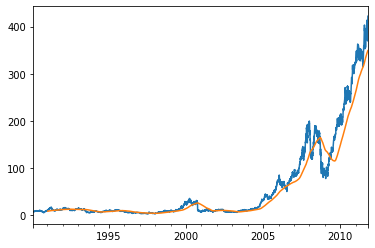

In [388]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

# rolling method will create an object that enable grouping over n-period sliding windows
# in this case 250 days

In [390]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

# min_periods is stating minimal periods non-NA to be computed

In [391]:
appl_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

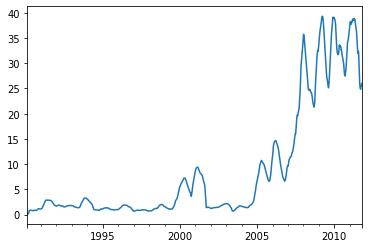

In [392]:
appl_std250.plot()

In [393]:
expanding_mean = appl_std250.expanding().mean()

# expanding method will compute from the beginning to a certain point in time, instead of just rolling certain time window

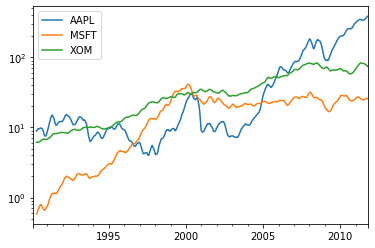

In [394]:
close_px.rolling(60).mean().plot(logy=True)

# rolling will roll a certain window and compute a certain fixed period of time

In [395]:
close_px.rolling('20D').mean()

# you can also assign a string indicating a fixed-size time offset

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [396]:
# Exponentially Weighted Functions

aapl_px = close_px.AAPL['2006':'2007']

In [397]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [398]:
ewma60 = aapl_px.ewm(span=30).mean()

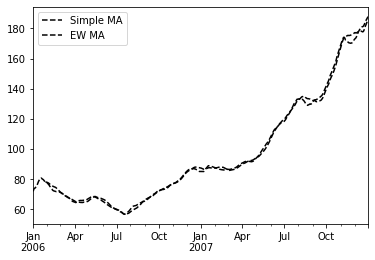

In [402]:
import matplotlib.pyplot as plt

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k--', label='EW MA')
plt.legend()

In [403]:
# Binary Moving Window Functions

# you can operate on two time series to get correlation and covariance

spx_px = close_px_all['SPX']

In [404]:
spx_rets = spx_px.pct_change()

In [405]:
returns = close_px.pct_change()

In [406]:
spx_px

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [407]:
spx_rets

1990-02-01         NaN
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 5472, dtype: float64

In [408]:
returns

,AAPL,MSFT,XOM
1990-02-01,NaN,NaN,NaN
1990-02-02,0.017812,0.000000,0.019608
1990-02-05,0.022500,0.000000,0.001603
1990-02-06,-0.007335,0.000000,-0.003200
1990-02-07,-0.043103,0.000000,0.016051
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [409]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

# correlation between AAPL with SPX_rets

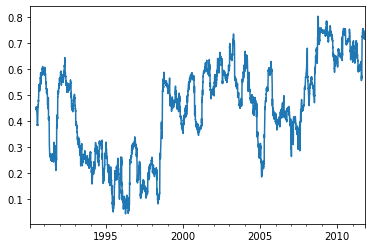

In [410]:
corr.plot()

In [412]:
# correlation of S&P 500 index with multiple stocks at once

corr = returns.rolling(125, min_periods=100).corr(spx_rets)

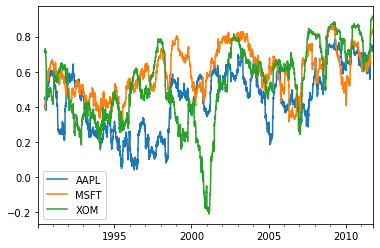

In [413]:
corr.plot()

In [414]:
# User Defined Moving Window Functions

# apply method will give means to apply an array function over a moving window

from scipy.stats import percentileofscore

In [415]:
score_at_2perc = lambda x: percentileofscore(x, 0.02)

In [416]:
result = returns.AAPL.rolling(250).apply(score_at_2perc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


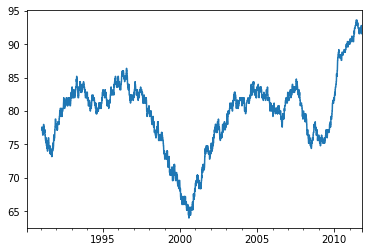

In [417]:
result.plot()